<a href="https://colab.research.google.com/github/manasdeshpande/DAV_Lab/blob/main/DAV_EXP_4%2C5%2C6/DAV_EXP_4%2C5%2C6(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis using Python

Courtesy for Time Series Analysis using ARIMA Model :
* https://www.kaggle.com/code/ahmadjalalmasood123/time-series-analysis-using-arima-model
* https://www.youtube.com/watch?v=e8Yw4alG16Q
* https://www.kaggle.com/code/lejcruz/time-series-analysis-python
* https://www.youtube.com/playlist?list=PLqYFiz7NM_SMC4ZgXplbreXlRY4Jf4zBP

Courtesy for Dataset - [Air Passengers.csv (Kaggle)](https://www.kaggle.com/datasets/rakannimer/air-passengers?resource=download)

Courtesy for Dataset - [Electric_Production.csv (Kaggle)](https://www.kaggle.com/datasets/shenba/time-series-datasets?select=Electric_Production.csv)

## Step - 1 : Importing Python Packages, Loading Data and Displaying the top 5 and last 5 rows

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
rcParams['figure.figsize']=10,6

In [3]:
dataset = pd. read_csv("monthly-beer-production-in-austr.csv")
dataset.rename(columns={'Monthly beer production': 'MBP'}, inplace=True)
dataset.describe()

,MBP
count,476.000000
mean,136.395378
std,33.738725
min,64.800000
25%,112.900000
50%,139.150000
75%,158.825000
max,217.800000


In [6]:
# Parse strings to datatime type
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

<ipython-input-6-0281f1f459f3>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)


In [7]:
indexedDataset.head(5)

,MBP
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [8]:
indexedDataset.tail(5)

,MBP
Month,
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0
1995-07-01,119.0
1995-08-01,153.0


## Step - 2 : Plotting the raw data

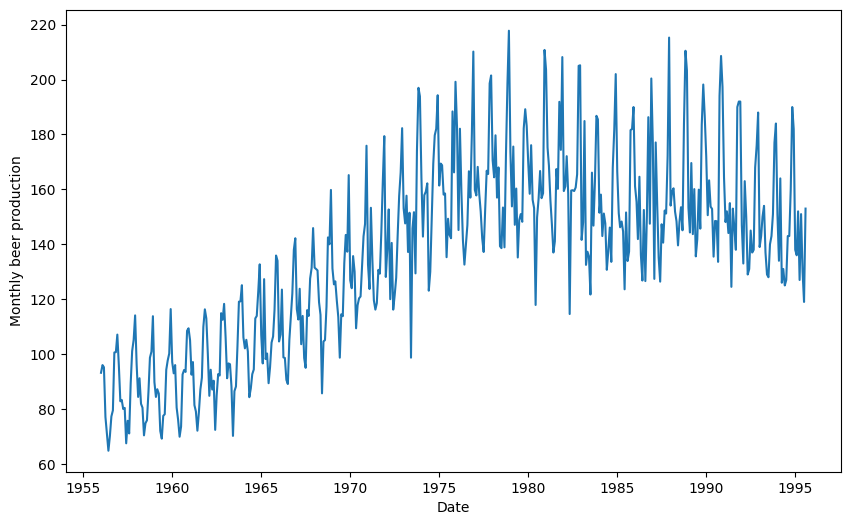

In [9]:
# Plot graph
plt.xlabel("Date")
plt.ylabel("Monthly beer production")
plt.plot(indexedDataset)

## Step - 3 : Check the stationarity of raw data

### a. Using Rolling Statistics

In [10]:
# Detecting Stationarity using Rolling Statistics
# As the mean is not constant, That
# rolling mean at yearly level
rollmean = indexedDataset.rolling(window=12).mean()
# rolling std at yearly level
rollstd = indexedDataset.rolling(window=12).std()
print(rollmean, rollstd)

                   MBP
Month                 
1956-01-01         NaN
1956-02-01         NaN
1956-03-01         NaN
1956-04-01         NaN
1956-05-01         NaN
...                ...
1995-04-01  146.166667
1995-05-01  147.833333
1995-06-01  148.250000
1995-07-01  147.583333
1995-08-01  148.416667

[476 rows x 1 columns]                   MBP
Month                
1956-01-01        NaN
1956-02-01        NaN
1956-03-01        NaN
1956-04-01        NaN
1956-05-01        NaN
...               ...
1995-04-01  21.391729
1995-05-01  20.875533
1995-06-01  20.423360
1995-07-01  21.292160
1995-08-01  21.292160

[476 rows x 1 columns]


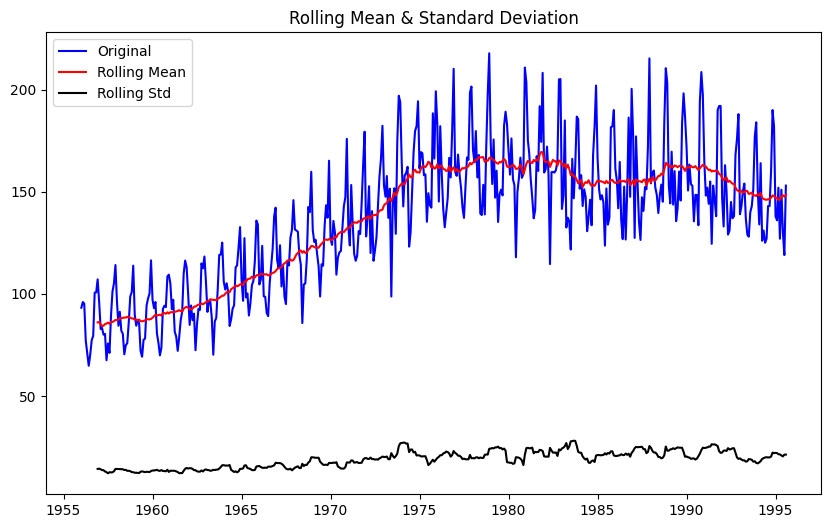

In [11]:
# Plot rolling statistics
orig = plt.plot(indexedDataset, color = 'blue', label = "Original")
mean = plt.plot(rollmean, color = 'red', label = "Rolling Mean")
std = plt.plot(rollstd, color = 'black', label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean & Standard Deviation")
plt.show()

### b. Using Augmented Dicky-Fuller (ADF) Test

In [13]:
# Perform Dicky-Fuller Test
#import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey Fuller Test")
# Here AIC helps to analyse the exact value from actual values and difference between them
dftest = adfuller(indexedDataset['MBP'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
for key, value in dftest[4].items():
  dfoutput['Critical value (%s)'%key]= value

print(dfoutput)

Results of Dickey Fuller Test
Test statistic               -2.282661
p-value                       0.177621
#Lags used                   17.000000
No. of observations used    458.000000
Critical value (1%)          -3.444709
Critical value (5%)          -2.867871
Critical value (10%)         -2.570142
dtype: float64


### c. test_stationarity()

 - Returns Plotting of Rolling Statistics
 - Test Statistics of Augmented Dicky-Fuller (ADF) test

In [28]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeSeries):
  # Determinig Rolling statistics
  movingaverage = timeSeries.rolling(window=12).mean()
  movingSTD = timeSeries.rolling(window=12).std()

  # Plot rolling statistics
  orig = plt.plot(timeSeries, color = 'blue', label = "Original")
  mean = plt.plot(movingaverage, color = 'red', label = "Rolling Mean")
  std = plt.plot(movingSTD, color = 'black', label = "Rolling Std")
  plt.legend(loc = "best")
  plt.title("Rolling Mean & Standard Deviation")
  plt.show()

  # Perform Dickey-Fuller Test
  print("Results of Dickey Fuller Test")
  dftest = adfuller(timeSeries['MBP'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
  for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]= value
  print(dfoutput)

## Step - 4 : Perform transformation to incorporate stationarity

#### Applying LogSCale to Raw Data

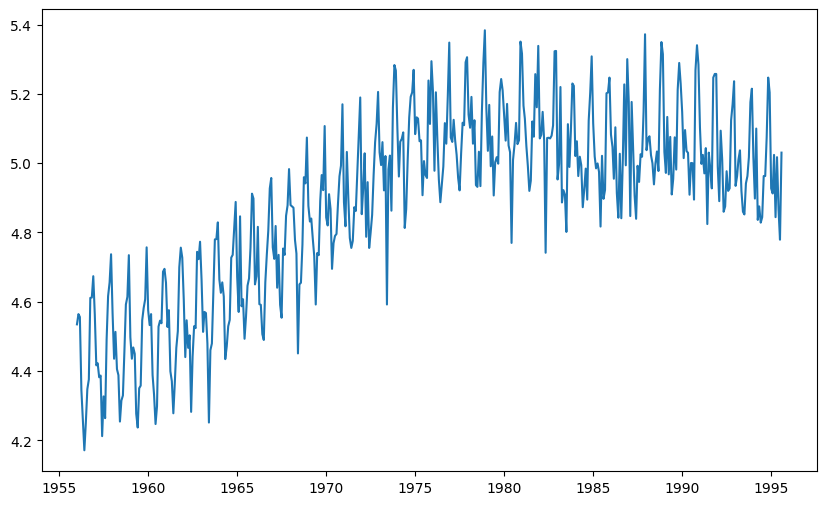

In [15]:
# Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

***Observation*** : When plotted, the scale changes as raw data is transformed to Logarithmic Scale

### Transformation - 1 : Subtracting Moving Average from LogScale Data

#### 1(a) : Computation

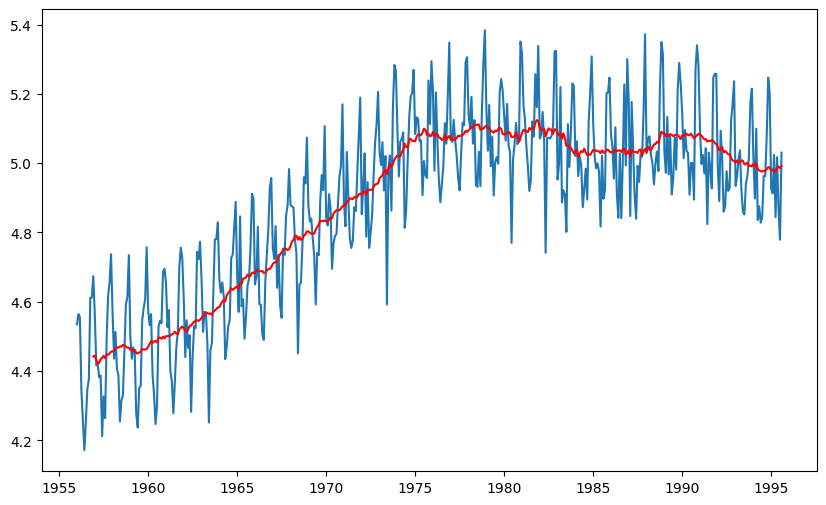

In [16]:
movingaverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingaverage, color='red')
#plt.plot(movingSTD, color='black')

In [17]:
dataLogScaleMinusMovingAverage = indexedDataset_logScale - movingaverage
dataLogScaleMinusMovingAverage.head(12)

,MBP
Month,
1956-01-01,NaN
1956-02-01,NaN
1956-03-01,NaN
1956-04-01,NaN
1956-05-01,NaN
1956-06-01,NaN
1956-07-01,NaN
1956-08-01,NaN
1956-09-01,NaN


In [18]:
#Remove NaN values
dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head(18)

,MBP
Month,
1956-12-01,0.231830
1957-01-01,0.118994
1957-02-01,-0.015558
1957-03-01,0.001590
1957-04-01,-0.041908
1957-05-01,-0.047399
1957-06-01,-0.225688
1957-07-01,-0.117442
1957-08-01,-0.173166


#### 1(b) : Plotting

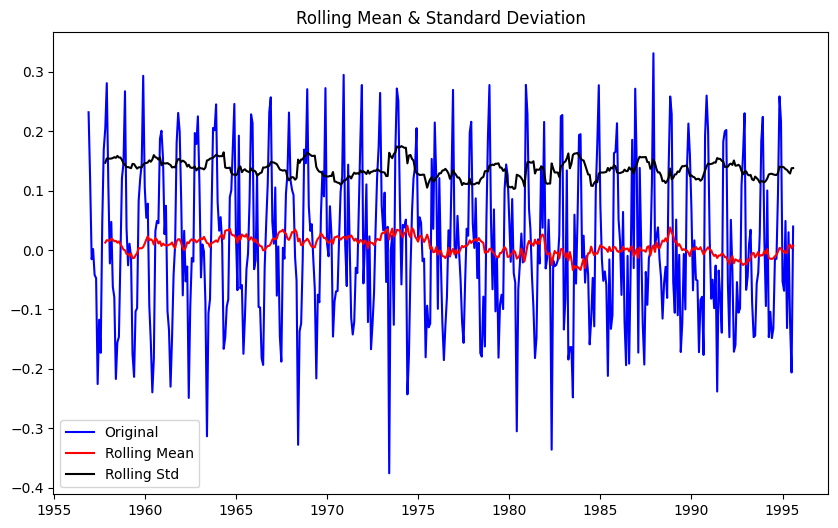

Results of Dickey Fuller Test
Test statistic               -3.432559
p-value                       0.009898
#Lags used                   13.000000
No. of observations used    451.000000
Critical value (1%)          -3.444933
Critical value (5%)          -2.867970
Critical value (10%)         -2.570195
dtype: float64


In [19]:
test_stationarity(dataLogScaleMinusMovingAverage)

Note :
* Test statistics & Critical values are almost equal. This helps to understand whether your data is stationary or not.
* p-value is almost nearer to 0


### Transformation - 2 : Subtrating Exponential Decay Weighted Average from LogScale Data

#### 2(a) : Computation

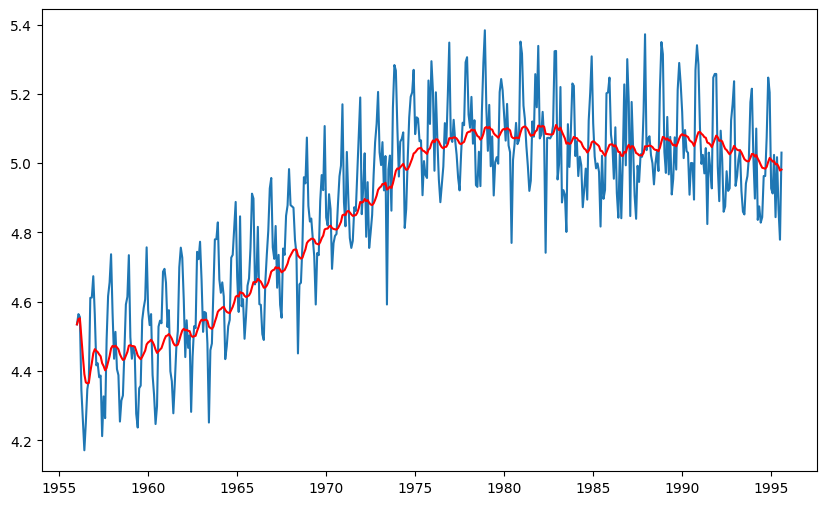

In [20]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

As the time series progresses, the average is also progessing to higher side

In [21]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage

#### 2(c) :  Plotting

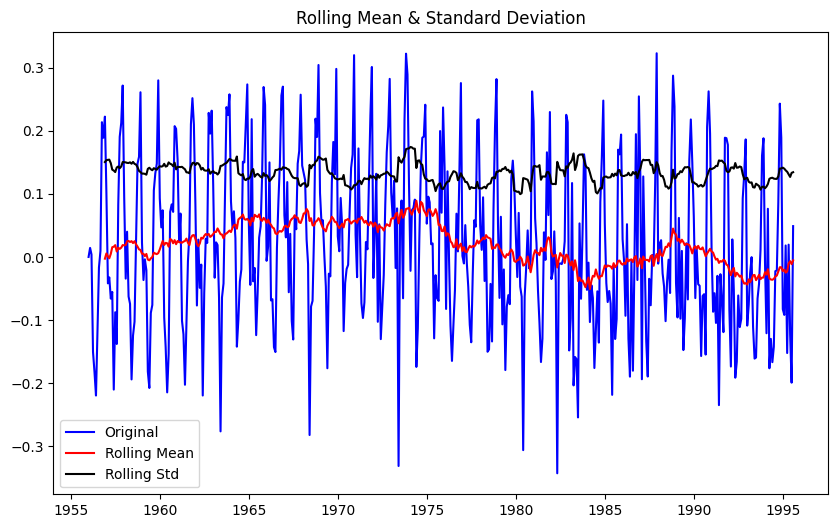

Results of Dickey Fuller Test
Test statistic               -1.507616
p-value                       0.529740
#Lags used                   13.000000
No. of observations used    462.000000
Critical value (1%)          -3.444584
Critical value (5%)          -2.867816
Critical value (10%)         -2.570113
dtype: float64


In [22]:
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

* The std deviation is almost flat. That means there is no trend.
* Rolling mean better than previous results.
* p value is nearing 0 ==> time series stationary.

## Step - 5 : Understanding the **Components** of Time Series

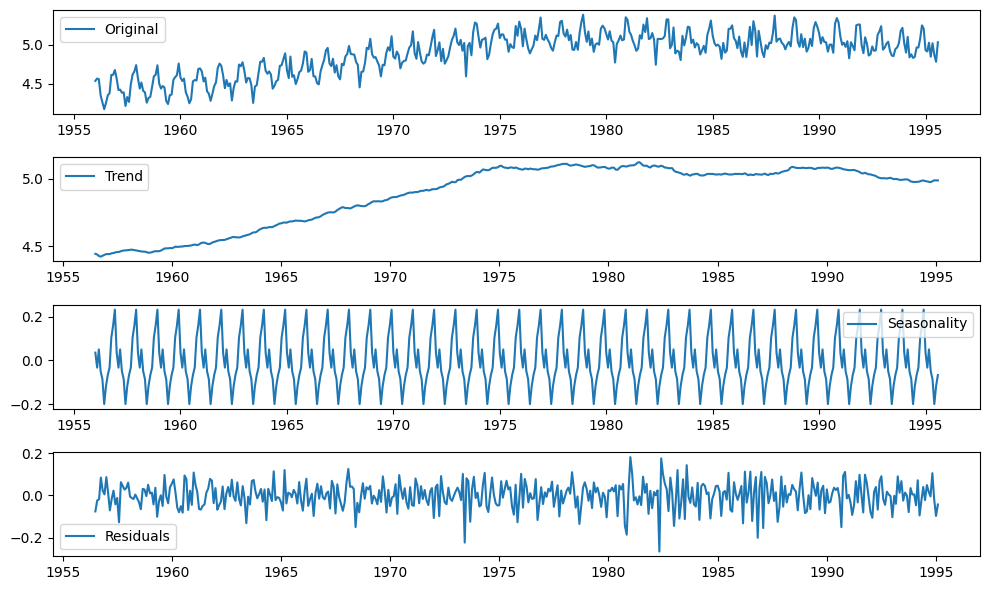

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(indexedDataset_logScale, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

* It shows a positive trend
* Depicts the seasonality component in the dataset
* Depicts the irregularity /  residuals present in the data

## Step - 6 : Check whether the noise is stationary or not

In [24]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
print(decomposedLogData)

Month
1956-07-01   -0.075295
1956-08-01   -0.023731
1956-09-01   -0.018133
1956-10-01    0.084279
1956-11-01    0.022530
                ...   
1994-10-01   -0.004604
1994-11-01    0.105032
1994-12-01   -0.017651
1995-01-01   -0.096675
1995-02-01   -0.042798
Name: resid, Length: 464, dtype: float64


In [25]:
decomposedLogData.describe()

count    464.000000
mean      -0.000075
std        0.061927
min       -0.264703
25%       -0.038039
50%        0.005082
75%        0.039594
max        0.180806
Name: resid, dtype: float64

In [26]:
decomposedLogData.head(12)

Month
1956-07-01   -0.075295
1956-08-01   -0.023731
1956-09-01   -0.018133
1956-10-01    0.084279
1956-11-01    0.022530
1956-12-01    0.005096
1957-01-01    0.086388
1957-02-01    0.008372
1957-03-01   -0.070303
1957-04-01   -0.015494
1957-05-01    0.022911
1957-06-01   -0.042018
Name: resid, dtype: float64

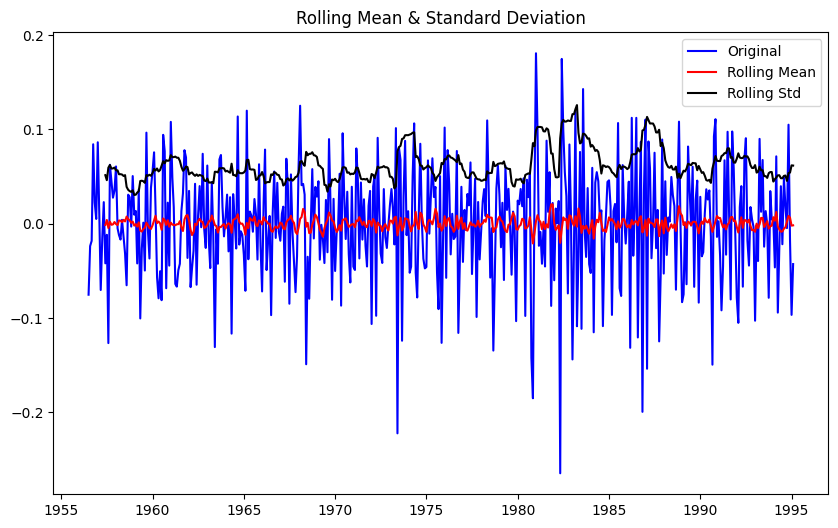

In [29]:
test_stationarity(decomposedLogData)

Observation : The residuals are not stationary.

## Step - 7 : Implement the AR Model

### 7(a) : Plot the ACF and PACF graphs
- for LogScale Data from whihc Exponential Decay Weighted Average is subtracted

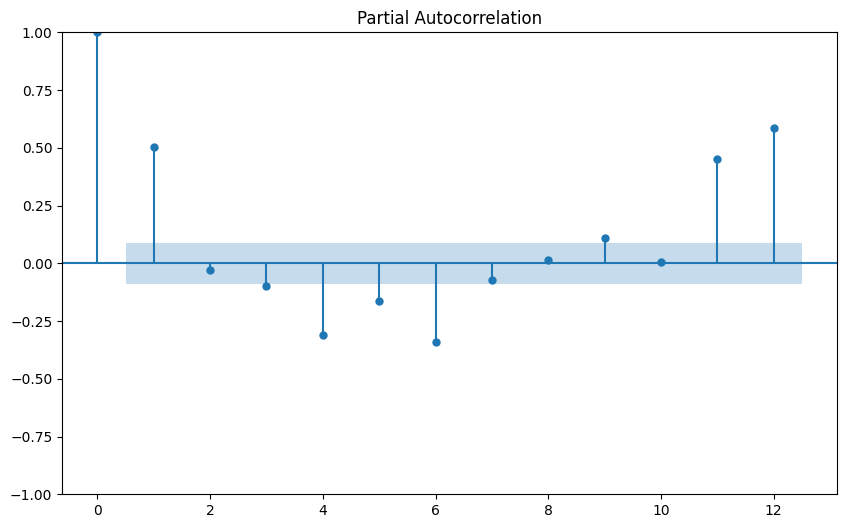

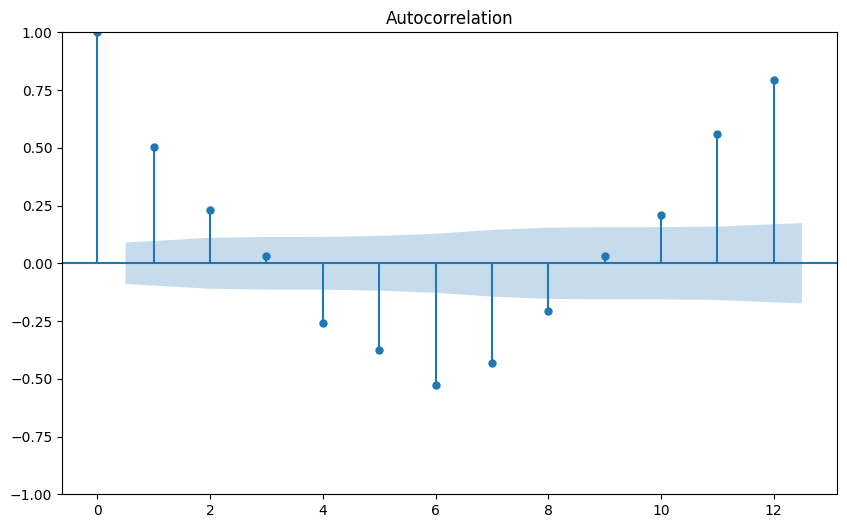

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf=plot_pacf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=12)
acf=plot_acf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=12)

### 7(b) : Split the LogScale Data for Training & Testing
- Training with 30 years data
- Testing with 10 years data

In [41]:
train=datasetLogScaleMinusMovingExponentialDecayAverage[:len(datasetLogScaleMinusMovingExponentialDecayAverage)-120]
test=datasetLogScaleMinusMovingExponentialDecayAverage[len(datasetLogScaleMinusMovingExponentialDecayAverage)-120:]

### 7(c) : Train the AR Model

In [42]:
from statsmodels.tsa.ar_model import AutoReg
# AR Model with p = 2 from PACF plot
model_1 = AutoReg(train, lags=1).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [43]:
print(model_1.summary())

                            AutoReg Model Results                             
Dep. Variable:                    MBP   No. Observations:                  356
Model:                     AutoReg(1)   Log Likelihood                 274.463
Method:               Conditional MLE   S.D. of innovations              0.112
Date:                Wed, 03 Apr 2024   AIC                           -542.926
Time:                        20:20:49   BIC                           -531.310
Sample:                    02-01-1956   HQIC                          -538.305
                         - 08-01-1985                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0124      0.006      2.053      0.040       0.001       0.024
MBP.L1         0.5348      0.045     11.894      0.000       0.447       0.623
                                    Roots           

Observation : Lower the p value, more significant that time lag

In [ ]:
# Experimenting with lag = 10
# model_2 = AutoReg(train, lags=10).fit()
#print(model_2.summary())

### 7(d) : Test the AR Model

In [44]:
pred=model_1.predict(start=len(train),end=len(datasetLogScaleMinusMovingExponentialDecayAverage)-1, dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [45]:
print(len(train))

356


In [46]:
print(pred)

1985-09-01   -0.057199
1985-10-01   -0.018164
1985-11-01    0.002714
1985-12-01    0.013880
1986-01-01    0.019853
                ...   
1995-04-01    0.026720
1995-05-01    0.026720
1995-06-01    0.026720
1995-07-01    0.026720
1995-08-01    0.026720
Freq: MS, Length: 120, dtype: float64


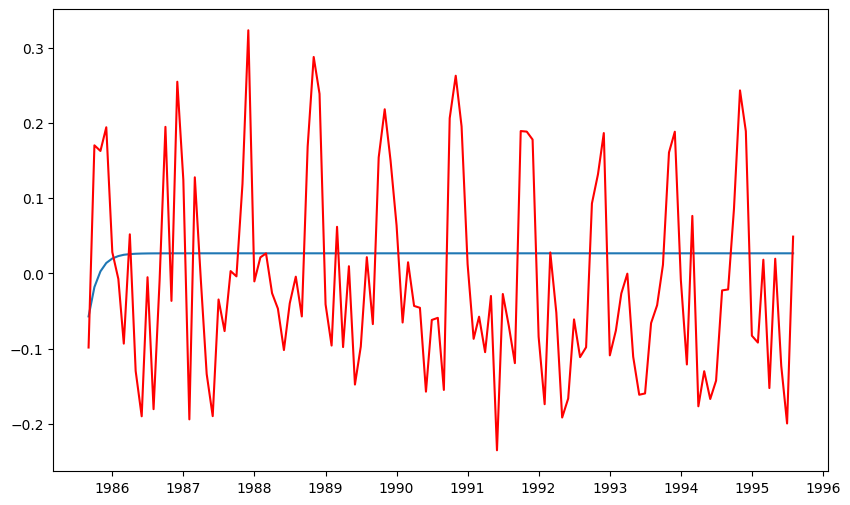

In [47]:
plt.plot(pred)
plt.plot(test, color='red')

### 7(e) : Calculate the Error

In [48]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))
print(rmse)

0.13267134167457806


### 7(f) : Making future predictions

In [49]:
pred_future=model_1.predict(start=len(datasetLogScaleMinusMovingExponentialDecayAverage)+1, end=len(datasetLogScaleMinusMovingExponentialDecayAverage)+60, dynamic=False)
print("Prediction for next 5 years")
print(pred_future)
print("No. of predictions : \t", len(pred_future))

Prediction for next 5 years
1995-10-01    0.02672
1995-11-01    0.02672
1995-12-01    0.02672
1996-01-01    0.02672
1996-02-01    0.02672
1996-03-01    0.02672
1996-04-01    0.02672
1996-05-01    0.02672
1996-06-01    0.02672
1996-07-01    0.02672
1996-08-01    0.02672
1996-09-01    0.02672
1996-10-01    0.02672
1996-11-01    0.02672
1996-12-01    0.02672
1997-01-01    0.02672
1997-02-01    0.02672
1997-03-01    0.02672
1997-04-01    0.02672
1997-05-01    0.02672
1997-06-01    0.02672
1997-07-01    0.02672
1997-08-01    0.02672
1997-09-01    0.02672
1997-10-01    0.02672
1997-11-01    0.02672
1997-12-01    0.02672
1998-01-01    0.02672
1998-02-01    0.02672
1998-03-01    0.02672
1998-04-01    0.02672
1998-05-01    0.02672
1998-06-01    0.02672
1998-07-01    0.02672
1998-08-01    0.02672
1998-09-01    0.02672
1998-10-01    0.02672
1998-11-01    0.02672
1998-12-01    0.02672
1999-01-01    0.02672
1999-02-01    0.02672
1999-03-01    0.02672
1999-04-01    0.02672
1999-05-01    0.02672
1999

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


## Step - 8 : Implement ARIMA Model

### 8(a) : Deriving the parameters of ARIMA Models

Note :
* ARIMA model consists of 3 models
  - AR (Autoregression) model
  - Integration
  - MA (Movung Average) model
* ARIMA Model has 3 parameters
  - p : autoregressive lags
  - d : order of differnetiation (# times a time series is differentiated)
  - q : moving average

#### 8(a) - 1 : Compute d *value*
Differentiate the LogScale Data by 1 ie. d = 1

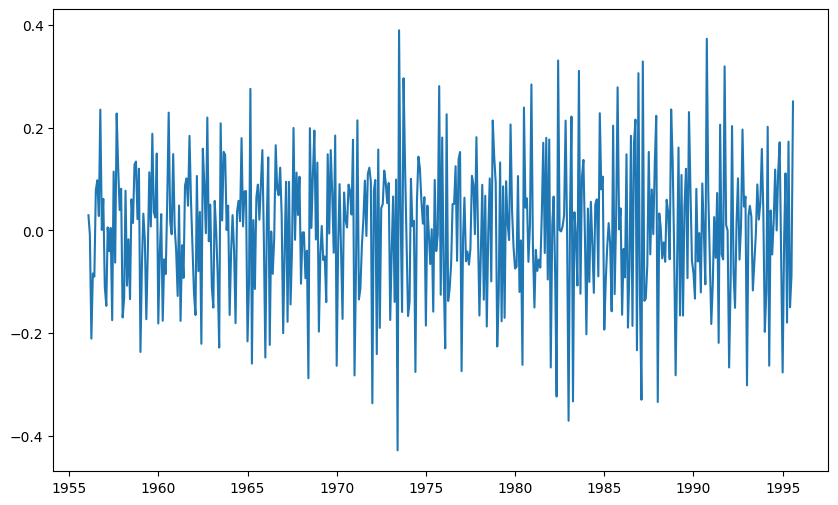

In [50]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

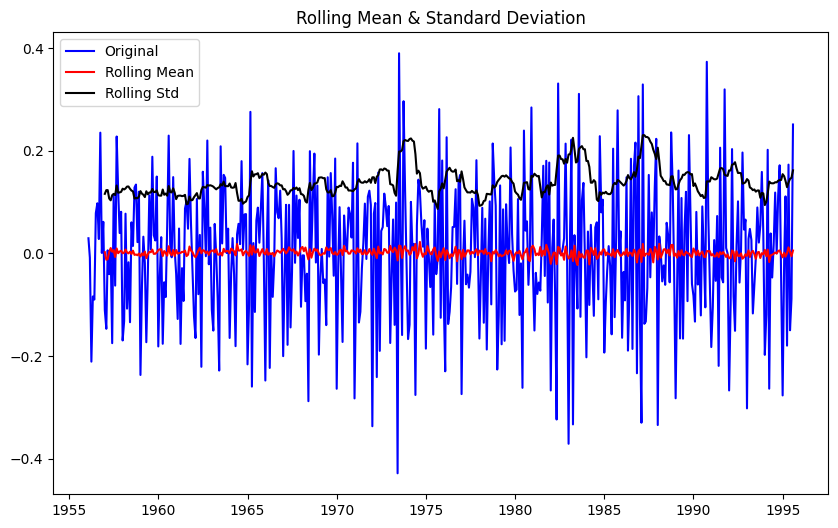

In [51]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

* Rolling Mean, Output is quite flat.
* Null Hypothesis / ADF is rejected as the time series is stationary.
* There is no trend



* This clearly states that, the time series is not stationary. So, we require the moving average parameter in place.

* We know the value of d = 1

#### 8(a)-2 : Compute p & q values

* Autocorrelation Function (ACF) Graph : To find q value
* Partial Autocorrelation Function (PACF) Graph : To compute p value

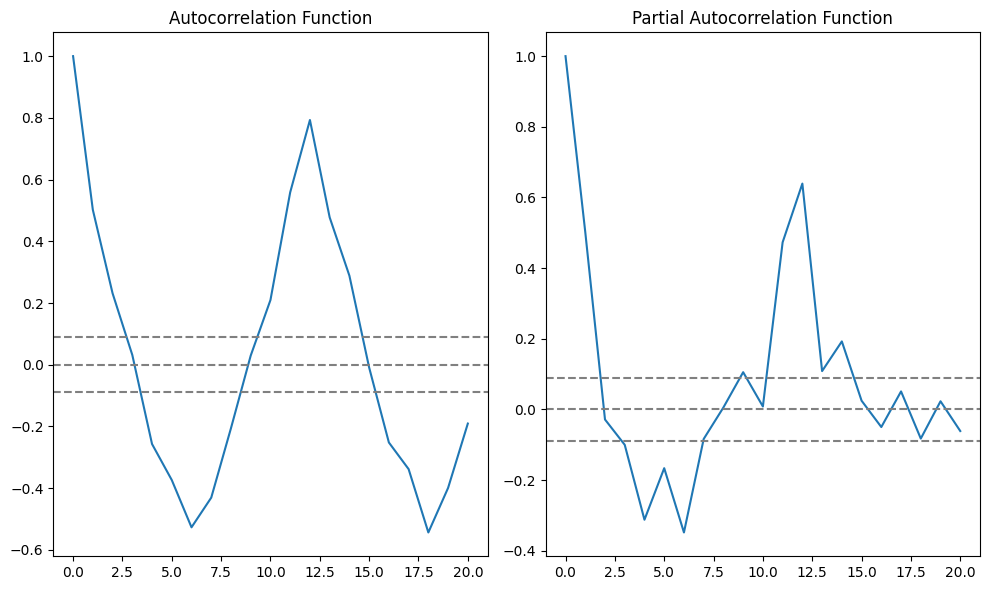

In [52]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogScaleMinusMovingExponentialDecayAverage, nlags=20)
lag_pacf = pacf(datasetLogScaleMinusMovingExponentialDecayAverage,nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Autocorrelation Function")

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

Check where the value drops to 0 for the first time in each of these graphs.
* In PACF graph : p value = 2 (around)
* In ACF graph : q value = 3 (around)

As we know the values of p, q, and d, Lets substitute the values in the ARIMA Model.

### 8(b) : Compute the Models

#### 8(b) - 1 : AR Model using ARIMA package

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Month
1956-01-01    0.018675
1956-02-01    0.009311
1956-03-01    0.016983
1956-04-01    0.011172
1956-05-01   -0.068215
                ...   
1995-04-01    0.021547
1995-05-01   -0.069521
1995-06-01    0.023922
1995-07-01   -0.054351
1995-08-01   -0.089802
Length: 476, dtype: float64
RSS: 6.172848
Plotting AR Model


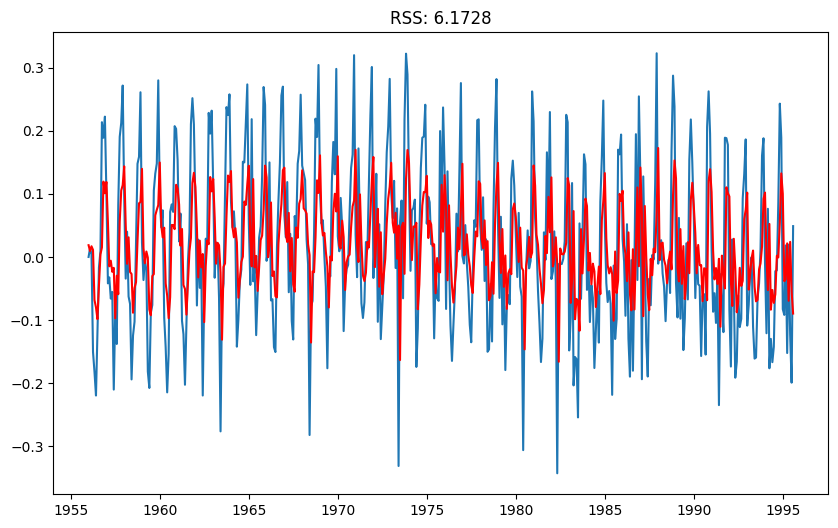

In [54]:
from statsmodels.tsa.arima.model import ARIMA
# AR Model
model_0 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,0))
results_AR = model_0.fit()
print(results_AR.fittedvalues)
print('RSS: %f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['MBP'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['MBP'])**2))
print("Plotting AR Model")

#### 8(b) - 2 : MA Model using ARIMA package

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Month
1956-01-01    0.018638
1956-02-01    0.009233
1956-03-01    0.016226
1956-04-01    0.010213
1956-05-01   -0.064340
                ...   
1995-04-01   -0.014046
1995-05-01   -0.056164
1995-06-01    0.042894
1995-07-01   -0.085786
1995-08-01   -0.059691
Length: 476, dtype: float64
RSS: 5.935198
Plotting Ma Model


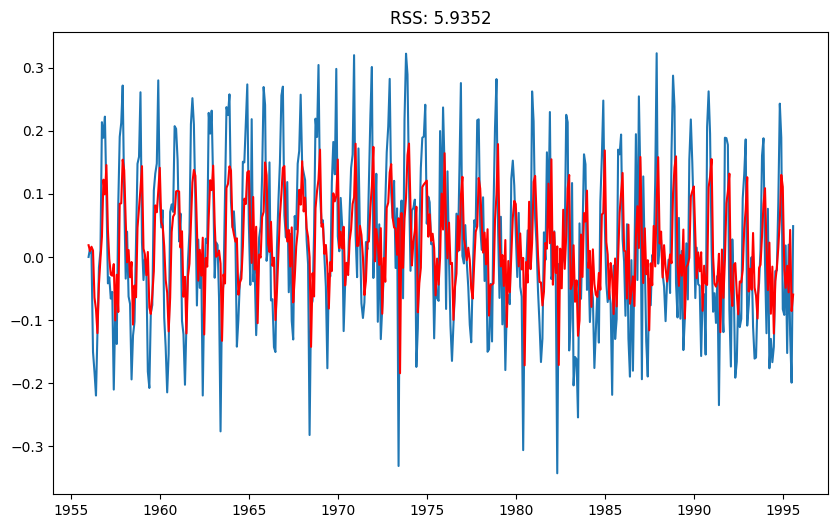

In [56]:
from statsmodels.tsa.arima.model import ARIMA
# MA Model
model_02 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(0,0,3))
results_MA = model_02.fit()
print(results_MA.fittedvalues)
print('RSS: %f' % sum((results_MA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['MBP'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['MBP'])**2))
print("Plotting Ma Model")

 #### 8(b) - 3 : ARMA Model using ARIMA package

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Month
1956-01-01    0.019476
1956-02-01    0.008614
1956-03-01    0.016874
1956-04-01    0.015115
1956-05-01   -0.057101
                ...   
1995-04-01   -0.068330
1995-05-01   -0.100685
1995-06-01   -0.087151
1995-07-01   -0.061668
1995-08-01   -0.009373
Length: 476, dtype: float64
RSS: 3.616029
Plotting ARIMA Model


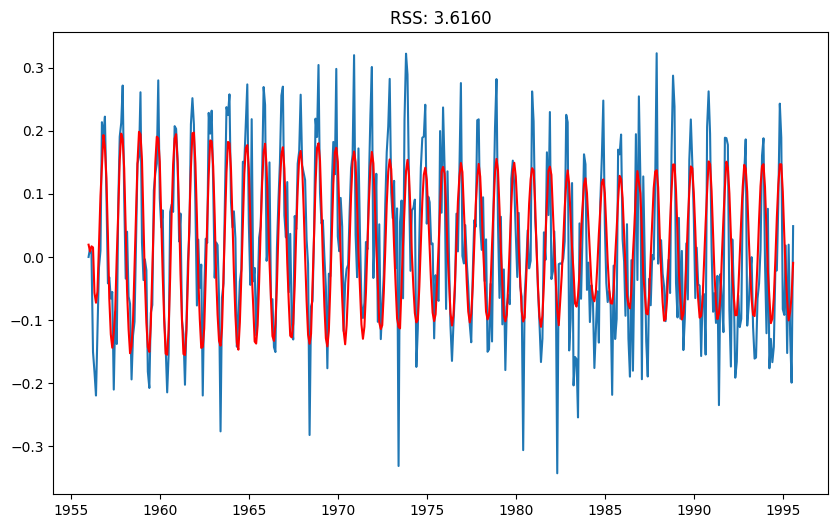

In [57]:
from statsmodels.tsa.arima.model import ARIMA
# ARMA Model
model_03 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,3))
results_ARMA = model_03.fit()
print(results_ARMA.fittedvalues)
print('RSS: %f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['MBP'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['MBP'])**2))
print("Plotting ARIMA Model")

 #### 8(b) - 4 : ARIMA Model using ARIMA package

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

Month
1956-01-01    0.000000
1956-02-01    0.000000
1956-03-01    0.011304
1956-04-01    0.002873
1956-05-01   -0.102465
                ...   
1995-04-01    0.008382
1995-05-01   -0.085968
1995-06-01    0.027766
1995-07-01   -0.087941
1995-08-01   -0.080075
Length: 476, dtype: float64
RSS: 6.119023
Plotting ARIMA Model


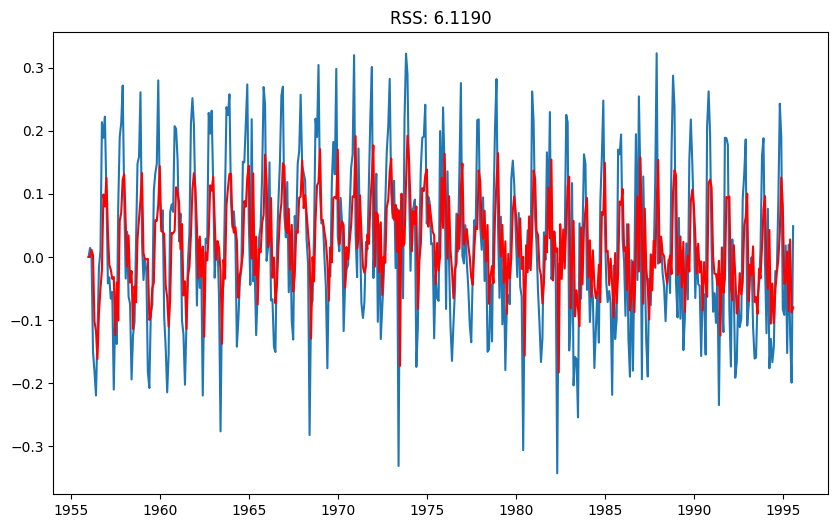

In [58]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
model_1 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,1,3))
results_ARIMA = model_1.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['MBP'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['MBP'])**2))
print("Plotting ARIMA Model")

### 8(c) : Install the pmdarima package

In [59]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.6 MB/s eta 0:00:00


In [60]:
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [61]:
stepwise_fit=auto_arima(indexedDataset_logScale, trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-651.710, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-543.335, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-565.457, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-570.879, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-545.307, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-579.786, Time=0.68 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-581.082, Time=0.79 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-649.642, Time=5.58 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-650.199, Time=3.70 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-648.759, Time=1.82 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-646.408, Time=3.27 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-579.172, Time=2.10 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-645.848, Time=5.06 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-649.575, Time=1.17 sec

Best model:  ARIMA(2,1,2)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  476
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 331.855
Date:                Wed, 03 Apr 2024   AIC                           -651.710
Time:                        20:25:49   BIC                           -626.730
Sample:                    01-01-1956   HQIC                          -641.887
                         - 08-01-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0011      0.001      2.112      0.035     8.1e-05       0.002
ar.L1         -0.2925      0.123     -2.374      0.018      -0.534      -0.051
ar.L2          0.3674      0.091      4.023      0.000       0.188       0.546
ma.L1         -0.1007      0.104     -0.973      0.331      -0.304       0.102
ma.L2         -0.8118      0.102     -7.933      0.000      -1.012      -0.611
sigma2         0.0144      0.001     14.210      0.000       0.012       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 2.52
Prob(Q):                              0.70   Prob(JB):                         0.28
Heteroskedasticity (H):               1.25   Skew:                            -0.13
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Note : SARIMAX - ARIMA with seasonality

### 8(d) : Prepare the fitted values for predictions

DATE
1985-02-01    0.000000
1985-03-01   -0.025609
1985-04-01   -0.143634
1985-05-01   -0.019178
1985-06-01   -0.001237
                ...   
2017-09-01   -0.085168
2017-10-01   -0.055839
2017-11-01    0.030585
2017-12-01    0.072182
2018-01-01    0.035118
Length: 396, dtype: float64
RSS: 0.741318
Plotting ARIMA Model


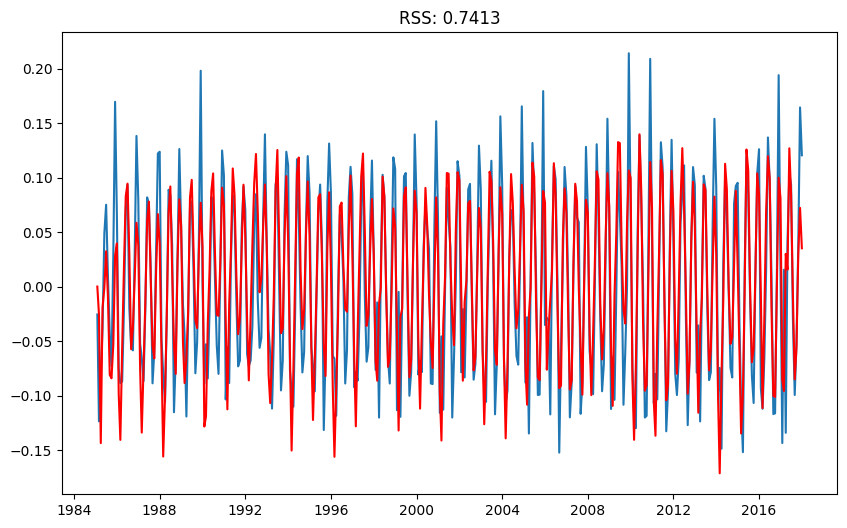

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model with
model_3 = ARIMA(datasetLogDiffShifting, order=(2,1,2))
results_ARIMA = model_3.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['MBP'])**2))
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Electric production'])**2))
print("Plotting ARIMA Model")

#### 8(d) - 1 : Convert the fitted values into a Series Format

In [63]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Month
1956-01-01    0.000000
1956-02-01    0.000000
1956-03-01    0.011448
1956-04-01    0.002746
1956-05-01   -0.104201
dtype: float64


#### 8(d)- 2 : Find the Cummulative Sum and find the predictions for the fitted values

In [64]:
#Convert to Cummulative Sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1956-01-01    0.000000
1956-02-01    0.000000
1956-03-01    0.011448
1956-04-01    0.014193
1956-05-01   -0.090008
dtype: float64


In [65]:
predictiona_ARIMA_log = pd.Series(indexedDataset_logScale['MBP'].iloc[0],index = indexedDataset_logScale.index)
predictiona_ARIMA_log = predictiona_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictiona_ARIMA_log.head()

Month
1956-01-01    4.534748
1956-02-01    4.534748
1956-03-01    4.546195
1956-04-01    4.548941
1956-05-01    4.444740
dtype: float64

#### 8(d)-3 :  Perform Exponential of the data to bring it to original form

In [66]:
predictions_ARIMA = np.exp(predictiona_ARIMA_log)

#### 8(d)-4: Plot the predictions made by ARIMA Model over the original Data

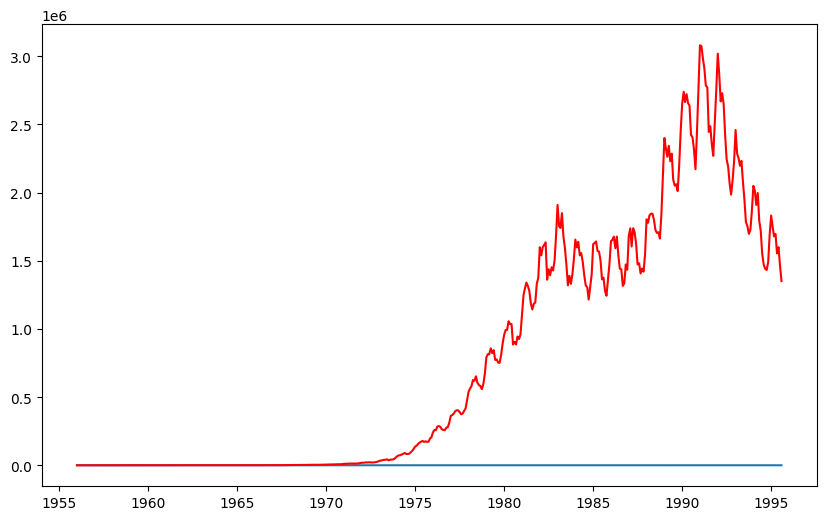

In [67]:
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA, color='red')

NOte:  Here the ARIMA model capture the shape of the Time Series. Only the magnitude varies.

### 8(e) : Predictions for 2 years

In [68]:
# Check the dimension of the dataset
indexedDataset_logScale

,MBP
Month,
1956-01-01,4.534748
1956-02-01,4.564348
1956-03-01,4.555980
1956-04-01,4.345103
1956-05-01,4.261270
...,...
1995-04-01,4.844187
1995-05-01,5.017280
1995-06-01,4.867534


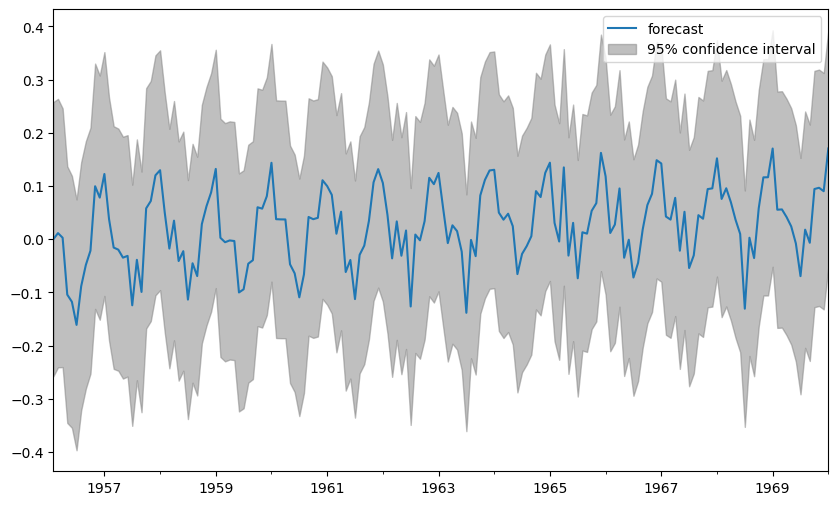

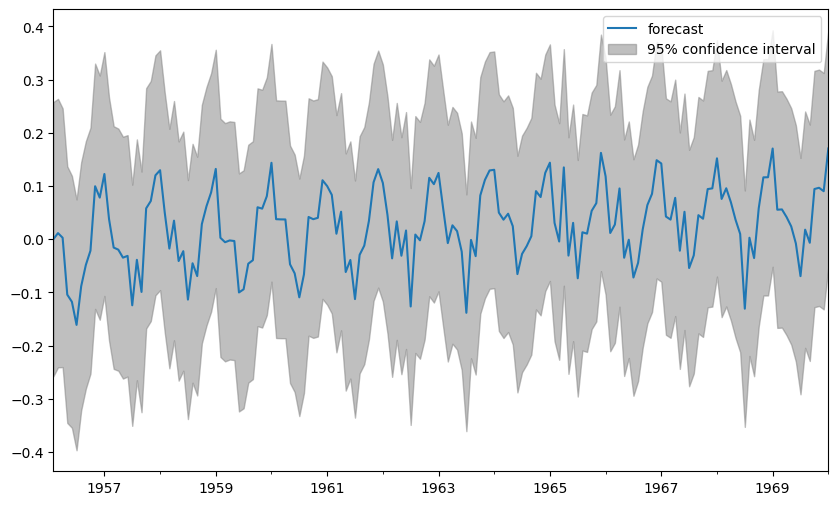

In [69]:
from statsmodels.graphics.tsaplots import plot_predict
# We have 144 rows + 24 to be predictions
plot_predict(results_ARIMA,1,168)

In [70]:
results_ARIMA.forecast(steps=24)

1995-09-01    0.021100
1995-10-01    0.006014
1995-11-01    0.001053
1995-12-01   -0.002636
1996-01-01   -0.003211
1996-02-01   -0.004311
1996-03-01   -0.004168
1996-04-01   -0.004594
1996-05-01   -0.004413
1996-06-01   -0.004616
1996-07-01   -0.004490
1996-08-01   -0.004600
1996-09-01   -0.004522
1996-10-01   -0.004584
1996-11-01   -0.004538
1996-12-01   -0.004574
1997-01-01   -0.004547
1997-02-01   -0.004568
1997-03-01   -0.004552
1997-04-01   -0.004564
1997-05-01   -0.004555
1997-06-01   -0.004562
1997-07-01   -0.004556
1997-08-01   -0.004561
Freq: MS, Name: predicted_mean, dtype: float64